In [9]:
import os
import librosa
import numpy as np

def load_audio_data(folder_path):
    data = []
    labels = []
    for label, sub_folder in enumerate(['Animal Sounds', 'Environment']):
        path = os.path.join(folder_path, sub_folder)
        for file in os.listdir(path):
            if file.endswith('.wav'):
                file_path = os.path.join(path, file)
                y, sr = librosa.load(file_path, sr=None)
                features = librosa.feature.melspectrogram(y=y, sr=sr)
                data.append(np.mean(features, axis=1))  # Extract mean features
                labels.append(label)
    return np.array(data), np.array(labels)

X, y = load_audio_data(r"C:\Users\User\Documents")
print(f"Data Shape: {X.shape}, Labels Shape: {y.shape}")


Data Shape: (65, 128), Labels Shape: (65,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


def build_model(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')  # Output for 2 categories
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
from sklearn.model_selection import KFold

def cross_validate(X, y, k=5, epochs=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, val_idx in kf.split(X):
        model = build_model((X.shape[1], 1))
        model.fit(X[train_idx], y[train_idx], epochs=epochs, verbose=0)
        acc = model.evaluate(X[val_idx], y[val_idx], verbose=0)[1]
        accuracies.append(acc)
    
    return np.mean(accuracies), np.std(accuracies)

mean_acc, std_dev = cross_validate(X, y)
print(f"Cross-Validation Mean Accuracy: {mean_acc}, Std Dev: {std_dev}")


Cross-Validation Mean Accuracy: 0.7230769395828247, Std Dev: 0.0615384578704834


In [12]:
from sklearn.model_selection import train_test_split

def validation_split(X, y, epochs=10):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = build_model((X.shape[1], 1))
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    acc = model.evaluate(X_val, y_val, verbose=0)[1]
    return acc

val_acc = validation_split(X, y)
print(f"Validation Split Accuracy: {val_acc}")


Validation Split Accuracy: 0.8461538553237915


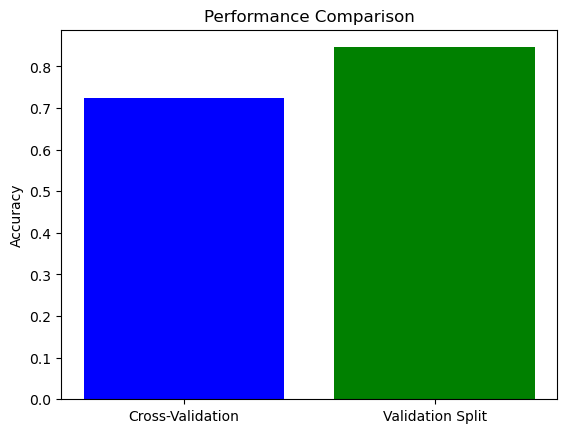

In [13]:
import matplotlib.pyplot as plt

def visualize_results(cross_val_results, val_result):
    methods = ['Cross-Validation', 'Validation Split']
    accuracies = [cross_val_results[0], val_result]
    plt.bar(methods, accuracies, color=['blue', 'green'])
    plt.ylabel('Accuracy')
    plt.title('Performance Comparison')
    plt.show()

visualize_results((mean_acc, std_dev), val_acc)
